In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [5]:
column_names = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
df = pd.read_csv("../breast-cancer-data.data",sep=',')
df.columns = column_names
df =df.drop(['ID'],axis=1)
df.head()
X = df.drop('Diagnosis',axis=1).copy()
y = df['Diagnosis'].copy()
y = y.apply(lambda x: 0 if x == 'M' else 1)
#
# X_encoded = pd.get_dummies(X,columns=['sex','cp','fbs','restecg','exang','slope','thal']).astype(float)
# X_encoded.head()

In [6]:
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier

#my classifier
clf = RandomForestClassifier(min_samples_split=2,
                             random_state=42,
                             criterion = "gini", # {“gini”, “entropy”, “log_loss”}
                             max_features="sqrt" # {“sqrt”, “log2”, None}
                             )
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

My-DecisionTreeClassifier


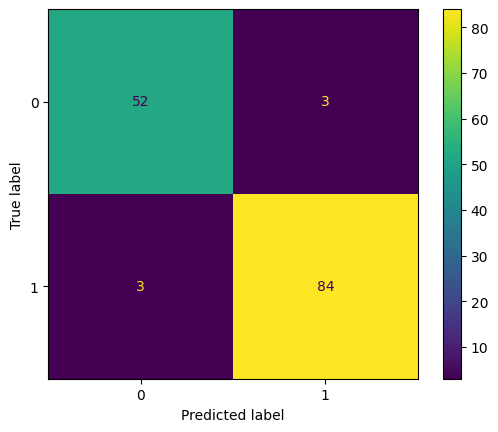

Precision: 0.9655
Accuracy: 0.9577
Sensitivity (Recall): 0.9655


In [8]:
from matplotlib import pyplot as plt
def plot_confusion_mat(ml_model,x_test1,y_test1):
    predictions = ml_model.predict(x_test1)
    cm = confusion_matrix(y_test1, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def print_metrics(ml_model,x_test1,y_test1):
    predictions = ml_model.predict(x_test1)
    precision = precision_score(y_test1, predictions)
    accuracy = accuracy_score(y_test1, predictions)
    sensitivity = recall_score(y_test1, predictions)
    print(f'Precision: {precision:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity (Recall): {sensitivity:.4f}')

print("My-DecisionTreeClassifier")
plot_confusion_mat(clf,X_test,y_test)
print_metrics(clf,X_test,y_test)

In [9]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#Decision-Tree
decision_tree = tree.DecisionTreeClassifier(min_samples_leaf=2,max_depth=2,min_samples_split=2)
decision_tree.fit(X_train,y_train)

#KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(X_train_scaled, y_train)

#Support-vector-machine
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train,y_train)

SVC(random_state=42)

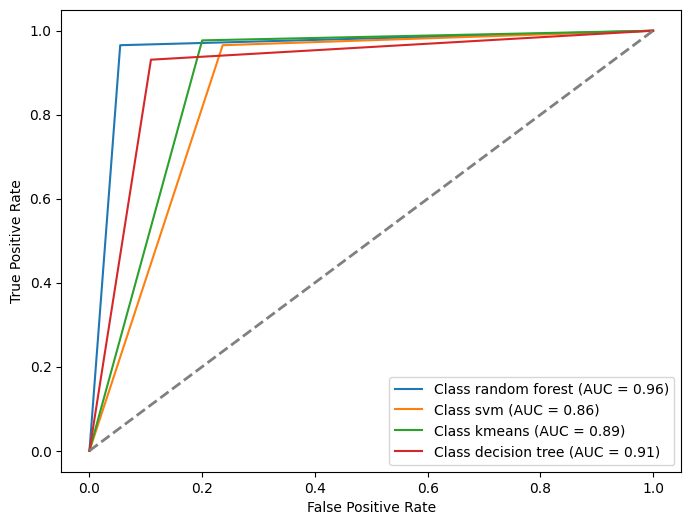

In [10]:
y_score_svm = clf_svm.predict(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

y_score_kmeans = kmeans.predict(X_test_scaled)
fpr_kmeans, tpr_kmeans, thresholds_kmeans = roc_curve(y_test, y_score_kmeans)
roc_auc_kmeans = auc(fpr_kmeans, tpr_kmeans)

y_score_dt = decision_tree.predict(X_test)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_score_rf = clf.predict(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, label=f'Class random forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'Class svm (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_kmeans, tpr_kmeans, label=f'Class kmeans (AUC = {roc_auc_kmeans:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Class decision tree (AUC = {roc_auc_dt:.2f})')

# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')

# Show the plot
plt.show()

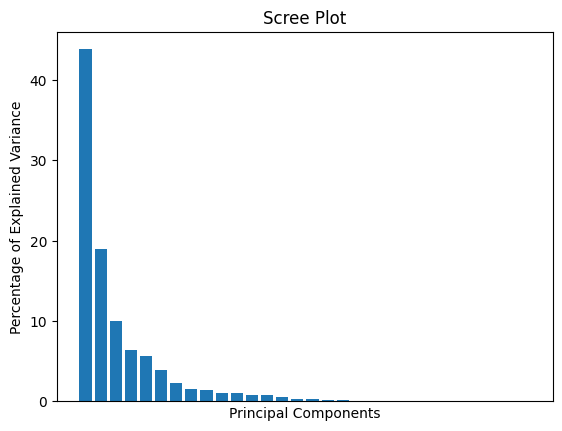

In [11]:
from sklearn.decomposition import PCA

pca= PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
axis='x',# changes apply to the x-axis
which='both',# both major and minor ticks are affected
bottom=False,# ticks along the bottom edge are off
top=False,# ticks along the top edge are off
labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [12]:
train_pc_1_cord = X_train_pca[:, 0]
train_pc_2_cord = X_train_pca[:, 1]

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

pca_train_scaled = scaler.fit_transform(np.vstack((train_pc_1_cord, train_pc_2_cord)).T)

clf.fit(pca_train_scaled,y_train)

RandomForestClassifier(random_state=42)

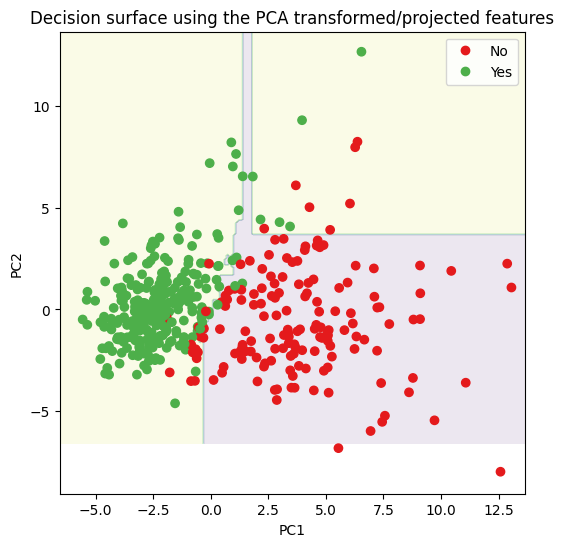

In [13]:
from matplotlib import colors
x_min = train_pc_1_cord.min() - 1
x_max = train_pc_2_cord.max() + 1

y_min = train_pc_1_cord.min() - 1
y_max =train_pc_2_cord.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
np.arange(start=y_min, stop=y_max, step=0.1))
Z = clf.predict(np.column_stack((xx.ravel(), yy.ravel( ))))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap( ['#e41a1c', '#4daf4a'])
scatter = ax.scatter(train_pc_1_cord, train_pc_2_cord, c=y_train,cmap=cmap)

## now create a legend
legend = ax. legend(scatter. legend_elements() [0],
scatter. legend_elements() [1],
loc="upper right")
legend.get_texts() [0].set_text("No")
legend.get_texts() [1].set_text("Yes")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transformed/projected features')
# plt.savefig('svm_default.png')
plt.show()